In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats


from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
import sklearn.metrics as metrics


#Setting Options
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [2]:
#Web Scraping Player Characteristics from FIFA21 

player_list = []

i = 0
while i < 30000:
    url_list = "https://sofifa.com/?&showCol%5B%5D=pi&showCol%5B%5D=ae&showCol%5B%5D=hi&showCol%5B%5D=wi&showCol%5B%5D=pf&showCol%5B%5D=oa&showCol%5B%5D=pt&showCol%5B%5D=bo&showCol%5B%5D=bp&showCol%5B%5D=gu&showCol%5B%5D=vl&showCol%5B%5D=wg&showCol%5B%5D=rc&showCol%5B%5D=ta&showCol%5B%5D=cr&showCol%5B%5D=fi&showCol%5B%5D=he&showCol%5B%5D=sh&showCol%5B%5D=vo&showCol%5B%5D=ts&showCol%5B%5D=dr&showCol%5B%5D=cu&showCol%5B%5D=fr&showCol%5B%5D=lo&showCol%5B%5D=bl&showCol%5B%5D=to&showCol%5B%5D=ac&showCol%5B%5D=sp&showCol%5B%5D=ag&showCol%5B%5D=re&showCol%5B%5D=ba&showCol%5B%5D=tp&showCol%5B%5D=so&showCol%5B%5D=ju&showCol%5B%5D=st&showCol%5B%5D=sr&showCol%5B%5D=ln&showCol%5B%5D=te&showCol%5B%5D=ar&showCol%5B%5D=in&showCol%5B%5D=po&showCol%5B%5D=vi&showCol%5B%5D=pe&showCol%5B%5D=cm&showCol%5B%5D=td&showCol%5B%5D=ma&showCol%5B%5D=sa&showCol%5B%5D=sl&showCol%5B%5D=tg&showCol%5B%5D=gd&showCol%5B%5D=gh&showCol%5B%5D=gc&showCol%5B%5D=gp&showCol%5B%5D=gr&showCol%5B%5D=tt&showCol%5B%5D=bs&showCol%5B%5D=ir&showCol%5B%5D=pac&showCol%5B%5D=sho&showCol%5B%5D=pas&showCol%5B%5D=dri&showCol%5B%5D=def&showCol%5B%5D=phy&offset="+str(i)
    #print(url_list)
    response = requests.get(url_list)
    #print(response)
    page = response.text
    #print(page)
    soup = BeautifulSoup(page,"lxml")
    #print(soup.prettify)
    rows = soup.find_all("tr")
    #print(rows)
    for row in rows:
        cells = row.find_all('td')
        #print(cells)
        cells_to_string = str(cells)
        cells_sub = (re.sub(re.compile('<.*?>'),'',cells_to_string))
        #print(cells_sub)
        player_list.append(cells_sub)
        result = pd.DataFrame(player_list)
    i += 60

In [3]:
print("Number of All Rows")
print(len(result));
print("")
print("Number of Rows Without Duplicated")
result.drop_duplicates(subset=None, keep="first", inplace=True)
print(len(result))

Number of All Rows
30195

Number of Rows Without Duplicated
18479


In [4]:
#Saving the result as Pickle file
result.to_pickle("PlayerListInitialPickle")

In [5]:
#Reading the pickle file as a data frame
result = pd.read_pickle("PlayerListInitialPickle")

In [6]:
#Getting the Header File
table_players = soup.find("table",attrs={"class":"table table-hover persist-area"})
header_players = table_players.find_all("th")
column_name_players = []
for row in header_players:
    column_name_players.append(row.text)
column_name_players

['',
 'Name',
 'Age',
 'OVA',
 'POT',
 'Team & Contract',
 'ID',
 'Height',
 'Weight',
 'foot',
 'BOV',
 'BP',
 'Growth',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits']

In [7]:
#Defining the column names
new_column_name_players = [
 'Name',
 'Age',
 'Overall',
 'Potential',
 'Team',
 'Height',
 'Weight',
 'Foot',
 'Best_Overall',
 'Position',
 'Growth',
 'Value',
 'Wage',
 'Release_Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY']

In [8]:
#Cleading the data
result = pd.read_pickle("PlayerListInitialPickle")

result = result[0].str.split(',',expand=True)


result[1] = result[1].str.replace("\n ","")

chars_to_remove = ["GK","RB","RCB","CB","LCB","LB","RWB","RDM","CDM","LDM","LWB","RM","RCM","CM","LCM","LM","LAM","CAM","RAM","RW","RF","CF","LF","LW","LS","ST","RS"]
for char in chars_to_remove:
    result[1]=result[1].str.replace(char,"")
    result[1]=result[1].str.lstrip()

result[5] = result[5].str.replace("\n\n\n\n","")
result[5] = result[5].str.split("\n").str[0]
result[5] = result[5].str.strip()

result[6] = result[6].replace(r'Loan', np.nan, regex=True)
result = result.iloc[1:]

result_WoLoan = result[result[6].notna()]

result_WoLoan.drop(result_WoLoan.columns[[0,6,66,67,68,69]],axis=1, inplace=True)

mask_loan = result[6].isnull()

result_loan = result.loc[mask_loan].shift(-1, axis=1)

result_loan.drop_duplicates(subset=[6], keep="first", inplace=True)

result_loan.drop(result_loan.columns[[5,6,66,67,68,69]],axis=1, inplace=True)

result_WoLoan.columns = new_column_name_players

result_loan.columns = new_column_name_players

result_master = pd.concat([result_WoLoan,result_loan]).reset_index()
del result_master["index"]

result_master.drop_duplicates(subset=None, keep="first",inplace=True)

#result_master

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
#Cleaning some characters
result_master = result_master[~result_master["Height"].str.contains("~")]
result_master = result_master[~result_master["Age"].str.contains("\n")]
result_master = result_master[result_master["Height"].str.contains("'")]

In [10]:
#Converting Player Height from feet to cm

result_master["Height"] = result_master["Height"].str[:-1]

def parse_height(height):
    # format: 5'11"
    height = height.split("'")
    feet = float(height[0])
    inch = float(height[1])
    return ((feet*30.48) + (inch*2.54))

result_master["Height"]=round(result_master["Height"].apply(lambda x:parse_height(x)),0)

In [11]:
#Converting Player Weight from Pounds to kg
result_master["Weight"] = round(result_master["Weight"].str.split("lbs").str[0].astype(float)*0.45359237,0)

In [12]:
#Cleaning the Value Column to convert into Decimal Values
result_master["Value"] = result_master["Value"].str.replace("€","")
result_master["Value"] = result_master["Value"].str.replace("M","")
result_master.loc[result_master["Value"].str.contains("K"),"Value"]=result_master["Value"].str.split("K").str[0].astype(float)/1000
result_master["Value"] = round(result_master["Value"].astype(float),2)
result_master = result_master.loc[result_master["Value"]>0]

In [14]:
#Cleaning Wage column and converting it to decimal values
result_master["Wage"] = result_master["Wage"].str.replace("€","")
result_master.loc[result_master["Wage"].str.contains("K"),"Wage"]=result_master["Wage"].str.split("K").str[0].astype(float)*1000
result_master["Wage"] = round(result_master["Wage"].astype(float)/1000000,5)

In [15]:
#Cleaning Release Clause column and converting it to decimal valuesl
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("€","")
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("M","")
result_master.loc[result_master["Release_Clause"].str.contains("K"),"Release_Clause"]=result_master["Release_Clause"].str.split("K").str[0].astype(float)/1000
result_master["Release_Clause"] = round(result_master["Release_Clause"].astype(float),2)

In [17]:
#Checking the chnages made so far
result_master.head(20)

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,M. Locatelli,22,80,86,Sassuolo,185.0,75.0,Right,81,CDM,6,31.0,0.0320,58.9,345,76,54,68,83,64,372,78,68,64,82,80,321,60,60,65,76,60,360,77,57,75,74,77,350,72,79,57,82,60,77,236,78,79,79,59,11,12,11,10,15,2043,431,2 ★,60,64,80,76,78,73
1,J. Sancho,20,87,92,Borussia Dortmund,180.0,76.0,Right,88,CAM,5,118.5,0.0820,210.3,371,82,81,38,87,83,401,92,84,65,70,90,432,86,80,91,85,90,333,73,51,77,67,65,317,44,39,82,87,65,85,105,32,41,32,52,7,11,10,11,13,2011,433,3 ★,83,76,82,91,37,64
2,J. Mascherano,36,79,79,Estudiantes de La Plata,175.0,73.0,Right,79,CDM,0,3.4,0.0150,5.1,306,68,42,66,79,51,329,58,63,50,78,80,345,64,59,68,75,79,345,76,81,63,70,55,348,87,82,51,68,60,81,234,77,80,77,34,6,10,8,5,5,1941,404,4 ★,61,53,72,68,78,72
4,Nuno Tavares,20,72,83,SL Benfica,183.0,75.0,Left,73,LWB,11,4.9,0.0060,10.8,271,75,34,54,64,44,325,74,73,55,50,73,379,85,87,77,70,60,357,79,58,78,76,66,305,72,63,66,62,42,71,201,64,71,66,52,8,13,6,12,13,1890,415,1 ★,86,52,64,73,65,75
5,L. Messi,33,93,93,FC Barcelona,170.0,72.0,Left,93,RW,0,103.5,0.5600,212.2,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,5 ★,85,92,91,95,38,65
7,P. Daka,21,77,84,FC Red Bull Salzburg,183.0,71.0,Right,79,ST,7,21.5,0.0240,36.6,341,51,82,67,68,73,311,74,65,35,61,76,420,92,93,87,77,71,381,76,88,80,66,71,288,63,17,80,53,75,69,58,18,24,16,39,8,6,9,5,11,1838,400,1 ★,93,78,59,76,24,70
8,T. Tomiyasu,21,75,85,Bologna,188.0,84.0,Right,77,CB,10,12.0,0.0190,24.0,261,62,29,69,71,30,290,68,48,37,66,71,350,71,68,70,71,70,291,42,69,75,77,28,283,73,76,38,59,37,60,231,77,77,77,45,9,14,6,5,11,1751,384,1 ★,69,32,63,69,76,75
10,J. Grealish,24,83,86,Aston Villa,180.0,68.0,Right,85,CAM,3,49.5,0.0820,97.8,351,81,77,36,85,72,406,88,77,74,82,85,406,79,79,85,79,84,333,75,37,80,61,80,328,60,44,81,85,58,83,140,48,49,43,51,11,6,11,10,13,2015,434,1 ★,79,76,83,86,46,64
11,A. Sambi Lokonga,20,73,82,RSC Anderlecht,183.0,73.0,Right,75,CM,9,6.5,0.0140,11.1,318,68,53,61,78,58,369,76,71,68,73,81,343,63,68,78,66,68,342,68,70,78,63,63,318,70,76,63,68,41,78,197,58,71,68,49,14,7,6,13,9,1936,409,1 ★,66,58,72,77,67,69
12,R. Varane,27,85,87,Real Madrid,190.0,81.0,Right,86,CB,2,57.5,0.2000,122.2,292,42,46,85,77,42,307,55,46,52,76,78,349,79,85,62,84,39,347,52,81,75,86,53,322,80,85,55,59,43,83,259,86,87,86,50,11,11,9,5,14,1926,425,3 ★,82,49,63,63,86,82


In [18]:
#Deleting rows with blank Composure columns
result_master = result_master.loc[result_master["Composure"]!=" "]
result_master = result_master[result_master["Base_Stats"]!=' ']

In [19]:
#Cleaning to IR column
result_master["Int_Reputation"]=result_master["Int_Reputation"].str[:-1]

In [20]:
#Checking for all the null values
result_master.isnull().any()

Name                False
Age                 False
Overall             False
Potential           False
Team                False
Height              False
Weight              False
Foot                False
Best_Overall        False
Position            False
Growth              False
Value               False
Wage                False
Release_Clause      False
Attacking           False
Crossing            False
Finishing           False
Heading_Accuracy    False
Short_Passing       False
Volleys             False
Skill               False
Dribbling           False
Curve               False
FK_Accuracy         False
Long_Passing        False
Ball_Control        False
Movement            False
Acceleration        False
Sprint_Speed        False
Agility             False
Reactions           False
Balance             False
Power               False
Shot_Power          False
Jumping             False
Stamina             False
Strength            False
Long_Shots          False
Mentality   

In [21]:
#Checking the data types of all the columns
result_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16780 entries, 0 to 18477
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              16780 non-null  object 
 1   Age               16780 non-null  object 
 2   Overall           16780 non-null  object 
 3   Potential         16780 non-null  object 
 4   Team              16780 non-null  object 
 5   Height            16780 non-null  float64
 6   Weight            16780 non-null  float64
 7   Foot              16780 non-null  object 
 8   Best_Overall      16780 non-null  object 
 9   Position          16780 non-null  object 
 10  Growth            16780 non-null  object 
 11  Value             16780 non-null  float64
 12  Wage              16780 non-null  float64
 13  Release_Clause    16780 non-null  float64
 14  Attacking         16780 non-null  object 
 15  Crossing          16780 non-null  object 
 16  Finishing         16780 non-null  object

In [22]:
#Converting all the values into integer data types

cols_to_convert=['Age',
 'Overall',
 'Potential',
 'Best_Overall',
 'Growth',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY']

for col in cols_to_convert:
    result_master[col] = result_master[col].astype("int")

In [23]:
result_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16780 entries, 0 to 18477
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              16780 non-null  object 
 1   Age               16780 non-null  int64  
 2   Overall           16780 non-null  int64  
 3   Potential         16780 non-null  int64  
 4   Team              16780 non-null  object 
 5   Height            16780 non-null  float64
 6   Weight            16780 non-null  float64
 7   Foot              16780 non-null  object 
 8   Best_Overall      16780 non-null  int64  
 9   Position          16780 non-null  object 
 10  Growth            16780 non-null  int64  
 11  Value             16780 non-null  float64
 12  Wage              16780 non-null  float64
 13  Release_Clause    16780 non-null  float64
 14  Attacking         16780 non-null  int64  
 15  Crossing          16780 non-null  int64  
 16  Finishing         16780 non-null  int64 

In [24]:
#Description of the numeric columns
result_master.describe()

,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
count,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.00000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000,16780.000000
mean,25.225268,67.237068,72.124672,181.302622,75.296722,68.092133,4.887604,3.308628,0.010934,5.737134,259.453278,51.794875,47.991597,53.750775,60.789511,45.126520,268.254708,57.860965,50.008641,44.669547,54.977235,60.738319,322.791538,65.159416,65.234803,64.593087,63.241538,64.562694,304.129142,60.049046,65.392193,63.504768,65.767819,49.415316,263.953456,57.672527,47.862038,52.483075,55.832420,50.103397,60.580930,143.510906,47.924255,48.939631,46.64702,79.019845,15.900894,15.725149,15.592193,15.794160,16.007449,1641.112872,363.677056,1.137843,67.981585,55.354410,59.428188,64.459476,51.032777,65.420620
std,5.018486,6.559974,5.806653,6.823258,7.127079,6.393980,5.574787,8.041743,0.020718,15.402742,73.210515,17.952089,19.474514,17.176179,13.932916,17.878923,77.510036,18.257589,18.374873,17.620251,14.700205,15.966590,55.089854,14.809622,14.558572,14.406439,8.720211,14.060008,49.558141,13.366198,11.807145,15.404518,12.398799,19.206874,63.873115,16.978521,20.840641,19.326730,13.585976,15.767153,11.565662,61.779377,20.292393,21.496955,21.15601,82.673496,17.138905,16.438169,16.063255,16.683293,17.426699,262.811760,39.021964,0.430951,11.165117,13.624246,9.771453,9.571334,16.685006,9.406803
min,16.000000,46.000000,46.000000,155.000000,48.000000,45.000000,0.000000,0.010000,0.000500,0.000000,42.000000,6.000000,3.000000,5.000000,8.000000,3.000000,40.000000,5.000000,6.000000,5.000000,5.000000,5.000000,120.000000,11.000000,12.000000,14.000000,30.000000,16.000000,128.000000,11.000000,22.000000,11.000000,16.000000,4.000000,50.000000,11.000000,3.000000,2.000000,10.000000,7.000000,12.000000,20.000000,3.000000,7.000000,4.00000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,752.000000,232.000000,1.000000,23.000000,14.000000,25.000000,27.000000,12.000000,29.000000
25%,21.000000,63.000000,68.000000,175.000000,70.000000,64.000000,0.000000,0.570000,0.002000,0.730000,234.000000,41.000000,33.000000,46.000000,57.000000,32.000000,236.000000,53.000000,38.000000,32.000000,46.000000,57.000000,295.000000,58.000000,58.000000,57.000000,58.000000,57.000000,275.000000,51.000000,58.000000,57.000000,58.000000,36.000000,238.000000,46.000000,27.000000,43.000000,47.000000,40.000000,54.000000,86.000000,30.000000,29.000000,25.00000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1511.000000,337.000000,1.000000,62.000000,46.000000,53.000000,59.000000,36.000000,60.000000
50%,25.000000,67.000000,72.000000,180.000000,75.000000,68.000000,3.000000,1.200000,0.004000,1.800000,273.000000,56.000000,52.000000,57.000000,64.000000,47.000000,282.000000,63.000000,53.000000,44.000000,58.000000,65.000000,332.000000,68.000000,68.00000

In [25]:
#Saving Pickle File of the Player List(Finalised)
result_master.to_pickle("PlayerListFinalPickle")

In [26]:
#Reading the Pickle File
player_list= pd.read_pickle("PlayerListFinalPickle")

# Exploratory Analysis

In [29]:
#Most Valuable Players in the Game
player_list.nlargest(10,columns="Value")[["Name","Overall","Age","Team","Position","Value"]]

,Name,Overall,Age,Team,Position,Value
20,K. Mbappé,90,21,Paris Saint-Germain,ST,185.5
101,Neymar Jr,91,28,Paris Saint-Germain,LW,132.0
122,K. De Bruyne,91,29,Manchester City,CM,127.5
141,R. Lewandowski,92,31,FC Bayern München,ST,124.5
106,H. Kane,89,26,Tottenham Hotspur,ST,123.0
25,E. Haaland,87,19,Borussia Dortmund,ST,122.5
70,Bruno Fernandes,88,25,Manchester United,CAM,121.0
263,M. Salah,90,28,Liverpool,RW,120.5
465,J. Oblak,91,27,Atlético Madrid,GK,120.0
1,J. Sancho,87,20,Borussia Dortmund,CAM,118.5


In [30]:
#Highest Rated Players Currently
player_list.nlargest(10,columns="Overall")[["Name","Age","Team","Value","Overall"]]

,Name,Age,Team,Value,Overall
5,L. Messi,33,FC Barcelona,103.5,93
45,Cristiano Ronaldo,35,Juventus,63.0,92
141,R. Lewandowski,31,FC Bayern München,124.5,92
101,Neymar Jr,28,Paris Saint-Germain,132.0,91
122,K. De Bruyne,29,Manchester City,127.5,91
465,J. Oblak,27,Atlético Madrid,120.0,91
20,K. Mbappé,21,Paris Saint-Germain,185.5,90
243,V. van Dijk,28,Liverpool,113.0,90
263,M. Salah,28,Liverpool,120.5,90
346,M. Neuer,34,FC Bayern München,20.5,90


In [37]:
#Mean Value of players based on position

pd.DataFrame(player_list.groupby("Position").Value.mean().sort_values(ascending=False)).head(20)

,Value
Position,
CF,7.968784
LW,5.090479
CM,4.930666
CAM,4.335941
RW,3.975867
LWB,3.935703
CDM,3.475152
LM,3.167841
RWB,3.161926


In [40]:
#Top 10 clubs in the world(Based on Mean Squad Value)

pd.DataFrame(player_list.groupby("Team").Value.mean().sort_values(ascending=False).head(10))

,Value
Team,
FC Bayern München,38.611852
Manchester City,36.075882
Liverpool,32.981471
Paris Saint-Germain,31.072500
Real Madrid,29.022500
Atlético Madrid,26.461111
FC Barcelona,25.513514
Chelsea,25.462581
Juventus,24.943438


In [42]:
#Top 10 clubs in the world(Based on Total Squad Value)

pd.DataFrame(player_list.groupby("Team").Value.sum().sort_values(ascending=False).head(10))

,Value
Team,
Manchester City,1226.58
Liverpool,1121.37
Real Madrid,1044.81
FC Bayern München,1042.52
Paris Saint-Germain,994.32
Atlético Madrid,952.60
FC Barcelona,944.00
Manchester United,836.78
Juventus,798.19


In [43]:
#Combined Age, Height & Weight Stats
player_list[["Age","Height","Weight"]].describe()

,Age,Height,Weight
count,16780.000000,16780.000000,16780.000000
mean,25.225268,181.302622,75.296722
std,5.018486,6.823258,7.127079
min,16.000000,155.000000,48.000000
25%,21.000000,175.000000,70.000000
50%,25.000000,180.000000,75.000000
75%,29.000000,185.000000,80.000000
max,45.000000,206.000000,110.000000


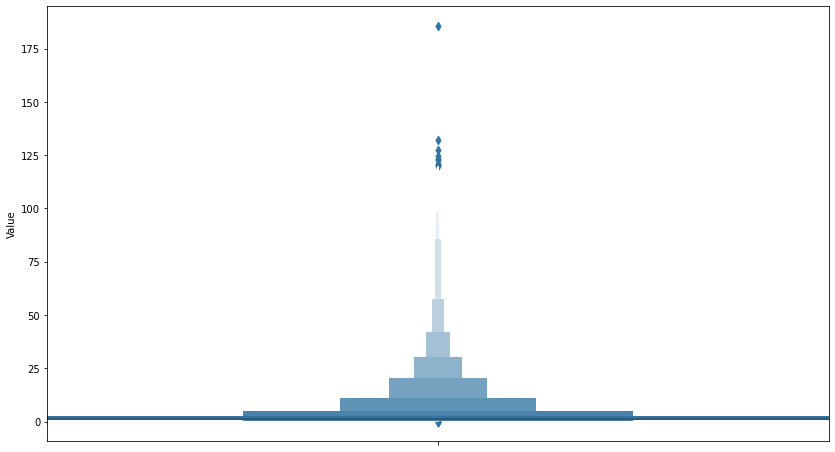

In [54]:
plt.figure(figsize=(14,8))
sns.boxenplot(y='Value', data=player_list, width=1)
plt.show()

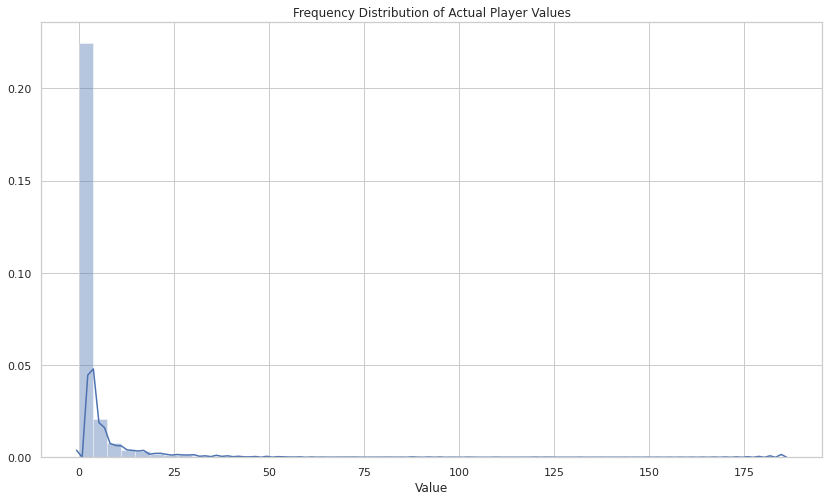

In [62]:
x = player_list.Value
sns.set(style="whitegrid")
plt.figure(figsize=(14,8))
sns.distplot(x).set_title('Frequency Distribution of Actual Player Values')
plt.show()

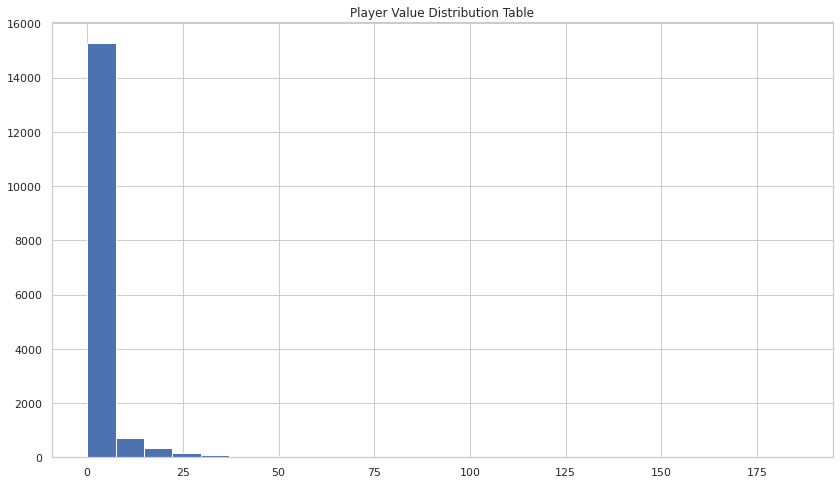

In [63]:
plt.figure(1, figsize=(14, 8))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=player_list)
plt.title('Player Value Distribution Table')
plt.show()

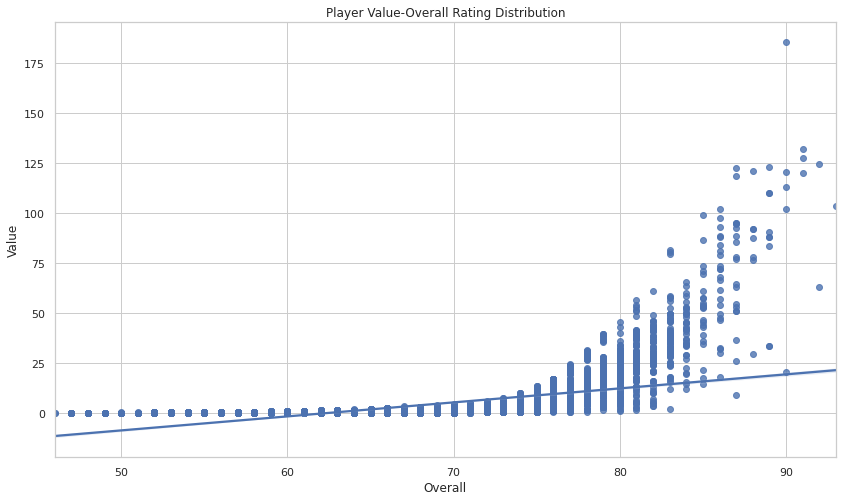

In [65]:
plt.figure(figsize=(14,8))
sns.regplot(x="Overall",y="Value",data=player_list)
plt.title('Player Value-Overall Rating Distribution')
plt.show()

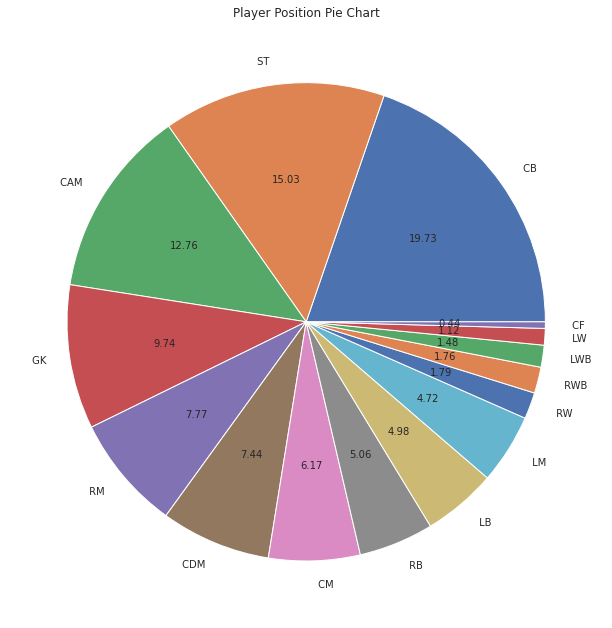

In [67]:
plt.figure(figsize=(12,11))
loc=player_list.Position.value_counts()
loc.plot(kind='pie',autopct='%.2f',fontsize=10,subplots=True)
plt.title("Player Position Pie Chart")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

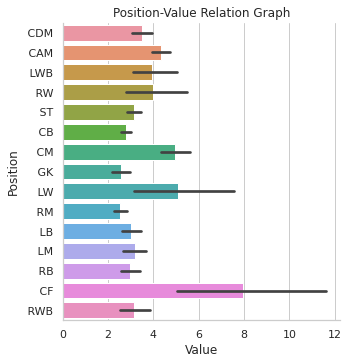

In [68]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="Position", x="Value", kind="bar",  data=player_list)
plt.title("Position-Value Relation Graph")
plt.show()

# Creating a Model

In [69]:
#Changing the order of Columns
player_list = player_list[['Name','Value','Age','Overall','Potential','Team','Height','Weight','Foot','Best_Overall',
                           'Position','Growth','Wage','Release_Clause','Attacking','Crossing','Finishing',
                           'Heading_Accuracy','Short_Passing','Volleys','Skill','Dribbling','Curve','FK_Accuracy',
                           'Long_Passing','Ball_Control','Movement','Acceleration','Sprint_Speed','Agility',
                           'Reactions','Balance','Power','Shot_Power','Jumping','Stamina','Strength','Long_Shots',
                           'Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
                           'Defending','Marking','Standing_Tackle','Sliding_Tackle','Goalkeeping','GK_Diving',
                           'GK_Handling','GK_Kicking','GK_Positioning','GK_Reflexes','Total_Stats','Base_Stats',
                           'Int_Reputation','PAC','SHO','PAS','DRI','DEF','PHY']]
player_list

,Name,Value,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,M. Locatelli,31.0,22,80,86,Sassuolo,185.0,75.0,Right,81,CDM,6,0.032,58.9,345,76,54,68,83,64,372,78,68,64,82,80,321,60,60,65,76,60,360,77,57,75,74,77,350,72,79,57,82,60,77,236,78,79,79,59,11,12,11,10,15,2043,431,2,60,64,80,76,78,73
1,J. Sancho,118.5,20,87,92,Borussia Dortmund,180.0,76.0,Right,88,CAM,5,0.082,210.3,371,82,81,38,87,83,401,92,84,65,70,90,432,86,80,91,85,90,333,73,51,77,67,65,317,44,39,82,87,65,85,105,32,41,32,52,7,11,10,11,13,2011,433,3,83,76,82,91,37,64
2,J. Mascherano,3.4,36,79,79,Estudiantes de La Plata,175.0,73.0,Right,79,CDM,0,0.015,5.1,306,68,42,66,79,51,329,58,63,50,78,80,345,64,59,68,75,79,345,76,81,63,70,55,348,87,82,51,68,60,81,234,77,80,77,34,6,10,8,5,5,1941,404,4,61,53,72,68,78,72
4,Nuno Tavares,4.9,20,72,83,SL Benfica,183.0,75.0,Left,73,LWB,11,0.006,10.8,271,75,34,54,64,44,325,74,73,55,50,73,379,85,87,77,70,60,357,79,58,78,76,66,305,72,63,66,62,42,71,201,64,71,66,52,8,13,6,12,13,1890,415,1,86,52,64,73,65,75
5,L. Messi,103.5,33,93,93,FC Barcelona,170.0,72.0,Left,93,RW,0,0.560,212.2,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,5,85,92,91,95,38,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18473,P. Steinwender,0.8,23,64,67,VfB Lübeck,180.0,73.0,Right,65,ST,3,0.004,0.0,300,58,63,56,60,63,284,69,53,43,51,68,368,85,84,71,55,73,288,70,47,54,56,61,230,42,19,54,53,62,55,92,30,33,29,47,14,10,7,11,5,1609,355,1,84,64,56,68,31,52
18474,J. Zeballos,1.2,23,64,71,FC Barcelona,178.0,75.0,Right,66,ST,7,0.002,0.0,303,39,71,72,61,60,244,64,43,38,44,55,312,56,63,60,65,68,301,62,65,52,59,63,235,31,14,64,56,70,51,44,16,15,13,56,14,7,10,13,12,1495,312,1,60,67,51,61,21,52
18475,J. Arweiler,0.8,23,62,69,ADO Den Haag,188.0,79.0,Left,64,ST,7,0.003,0.0,278,42,66,60,59,51,240,55,44,33,44,64,266,54,54,51,53,54,315,65,62,55,74,59,241,36,16,66,55,68,62,71,27,23,21,52,9,9,11,14,9,1463,313,1,54,64,51,57,26,61
18476,J. Sekidika,1.4,23,66,72,Atiker Konyaspor,175.0,68.0,Right,67,RM,6,0.014,0.0,281,66,60,42,62,51,285,69,46,48,58,64,382,88,88,84,47,75,286,71,46,55,56,58,231,28,24,65,51,63,47,86,29,28,29,39,7,12,6,6,8,1590,356,1,88,62,59,68,29,50


In [70]:
#Viewing the player correlations
corr_mat = player_list.corr()
corr_mat

,Value,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
Value,1.000000,0.023305,0.571885,0.543889,0.000661,0.024853,0.584845,-0.106440,0.787743,0.975876,0.251171,0.215258,0.206418,0.146804,0.293754,0.217563,0.260325,0.232717,0.233065,0.194310,0.273825,0.262880,0.242484,0.161480,0.167124,0.171990,0.503291,0.118584,0.278534,0.284338,0.107137,0.206868,0.112350,0.216507,0.262752,0.160342,0.133285,0.214984,0.320808,0.175636,0.385152,0.116687,0.135649,0.113088,0.095725,-0.009957,-0.010183,-0.010269,-0.010168,-0.010091,-0.008501,0.338252,0.470212,0.447917,0.204159,0.276838,0.395158,0.394337,0.150911,0.227908
Age,0.023305,1.000000,0.451698,-0.306338,0.090270,0.256081,0.373910,-0.850603,0.175841,0.017259,0.156626,0.131328,0.076415,0.161342,0.138464,0.163347,0.139381,0.008153,0.157938,0.206017,0.195132,0.078533,-0.082199,-0.219004,-0.210837,-0.056821,0.454907,-0.096997,0.286195,0.267633,0.204990,0.044083,0.349485,0.165224,0.243609,0.266360,0.185506,0.088262,0.204042,0.170841,0.393823,0.117920,0.156553,0.103924,0.088588,0.114715,0.109313,0.113949,0.111238,0.122394,0.109516,0.244487,0.355203,0.362182,-0.227693,0.267756,0.352843,0.177576,0.218786,0.420663
Overall,0.571885,0.451698,1.000000,0.599507,0.017418,0.129569,0.984689,-0.552280,0.610677,0.536660,0.426350,0.375609,0.304533,0.313285,0.494076,0.350957,0.436493,0.354165,0.388246,0.355272,0.483855,0.429624,0.316448,0.161325,0.173412,0.232621,0.870302,0.112292,0.543315,0.525039,0.259998,0.349995,0.329076,0.383531,0.485836,0.380405,0.306468,0.332822,0.500983,0.313783,0.698556,0.259942,0.298116,0.247675,0.221466,0.005269,0.004565,0.003752,0.000575,0.011825,0.005116,0.597124,0.819854,0.455124,0.204326,0.459382,0.682441,0.625207,0.344694,0.536689
Potential,0.543889,-0.306338,0.599507,1.000000,-0.034178,-0.067228,0.646262,0.336139,0.475845,0.518720,0.236150,0.199846,0.185685,0.141640,0.326632,0.173452,0.265331,0.276105,0.211038,0.150550,0.284177,0.301682,0.286674,0.230947,0.231807,0.195445,0.472914,0.146387,0.224420,0.269401,0.062723,0.193317,0.008859,0.192253,0.235751,0.127545,0.127586,0.194763,0.301992,0.150102,0.359820,0.134234,0.137557,0.133822,0.124068,-0.031844,-0.030109,-0.032295,-0.035292,-0.028685,-0.031002,0.325281,0.469200,0.267166,0.289705,0.233638,0.381451,0.444792,0.152296,0.145187
Height,0.000661,0.090270,0.017418,-0.034178,1.000000,0.759702,0.003425,-0.056095,0.020244,0.000332,-0.371899,-0.507157,-0.384885,0.040998,-0.359823,-0.353363,-0.470723,-0.496493,-0.462873,-0.418299,-0.325046,-0.423822,-0.644090,-0.561545,-0.463550,-0.649972,-0.006178,-0.782379,-0.164677,-0.201520,-0.002753,-0.292119,0.544467,-0.400160,-0.323333,-0.035877,-0.047156,-0.445744,-0.385911,-0.329968,-0.168159,-0.063210,-0.059558,-0.062066,-0.064393,0.356486,0.352887,0.352631,0.347397,0.352567,0.353762,-0.389793,-0.146923,0.041733,-0.388251,-0.115755,-0.224179,-0.329326,0.087028,0.432592
Weight,0.024853,0.256081,0.129569,-0.067228,0.759702,1.000000,0.102725,-0.222491,0.062847,0.020506,-0.278854,-0.409139,-0.297804,0.072422,-0.280723,-0.257464,-0.374408,-0.415470,-0.364271,-0.317444,-0.249003,-0.343692,-0.547989,-0.504724,-0.416443,-0.565984,0.097651,-0.664919,-0.030772,-0.080407,0.079116,-0.236427,0.632591,-0.290819,-0.223343,0.042834,-0.026604,-0.349716,-0.293354,-0.234288,-0.058134,-0.050422,-0.038080,-0.052310,-0.057561,0.329337,0.325211,0.325584,0.320502,0.327872,0.326133,-0.271305,-0.026715,0.108909,-0.350005,-0.018417,-0.122785,-0.232273,0.096866,0.523347
Best_Overall,0.584845,0.373910,0

In [71]:
#Correlation Table with the most correlated values
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=False).head(15)

,Value
Value,1.000000
Release_Clause,0.975876
Wage,0.787743
Best_Overall,0.584845
Overall,0.571885
Potential,0.543889
Reactions,0.503291
Base_Stats,0.470212
Int_Reputation,0.447917
PAS,0.395158


In [73]:
#Correlation Table with the Least Correlated Values
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=True).head(15)

,Value
Growth,-0.106440
GK_Handling,-0.010269
GK_Diving,-0.010183
GK_Kicking,-0.010168
GK_Positioning,-0.010091
Goalkeeping,-0.009957
GK_Reflexes,-0.008501
Height,0.000661
Age,0.023305
Weight,0.024853


In [74]:
#Slicing data in terms of feature and target

Xb= player_list.drop(columns=["Value","Name","Team","Foot","Position"])
yb= player_list.loc[:,"Value"]

In [75]:
#Fitness Model with the Player Market Value as the Target
player_modelb = sm.OLS(yb, Xb, data=player_list)

resultsb = player_modelb.fit()

print(resultsb.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              9988.
Date:                Thu, 01 Jul 2021   Prob (F-statistic):                        0.00
Time:                        14:50:43   Log-Likelihood:                         -31496.
No. Observations:               16780   AIC:                                  6.309e+04
Df Residuals:                   16731   BIC:                                  6.347e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [80]:
#Coefficients chosen by the regression model
regressor = LinearRegression()
regressor.fit(Xb,yb)
coeff_df = pd.DataFrame(regressor.coef_, Xb.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False).T

,Wage,Int_Reputation,Release_Clause,Overall,Potential,DEF,GK_Kicking,Balance,PAC,Best_Overall,Height,Volleys,Weight,Strength,Base_Stats,Composure,PAS,Stamina,Positioning,Agility,Finishing,FK_Accuracy,Curve,Reactions,Aggression,Marking,GK_Handling,Power,Movement,Vision,Dribbling,Mentality,Attacking,Sliding_Tackle,Short_Passing,Interceptions,Long_Shots,Total_Stats,Skill,Goalkeeping,Defending,Shot_Power,Ball_Control,DRI,GK_Positioning,GK_Diving,Crossing,Standing_Tackle,Jumping,Heading_Accuracy,SHO,Sprint_Speed,Long_Passing,GK_Reflexes,Penalties,Acceleration,PHY,Growth,Age
Coefficient,38.502734,0.458957,0.449005,0.046728,0.011064,0.008595,0.007733,0.007315,0.006854,0.006775,0.005989,0.005588,0.005028,0.004939,0.003827,0.003381,0.003124,0.003072,0.002851,0.002795,0.002651,0.002547,0.002357,0.002172,0.00215,0.002044,0.001985,0.00172,0.001034,0.000918,0.000874,0.00069,0.000182,0.000017,-0.000207,-0.000243,-0.000578,-0.001099,-0.001211,-0.001733,-0.00178,-0.001842,-0.002455,-0.003023,-0.003302,-0.003611,-0.003774,-0.003841,-0.003871,-0.004077,-0.004278,-0.004488,-0.004535,-0.004539,-0.004985,-0.00676,-0.007446,-0.035664,-0.091027


In [88]:
#Prediction and differentiation between the actual value and predicted value
y_pred = regressor.predict(Xb)
df = pd.DataFrame({'Name':player_list.Name,'Actual': yb, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(15),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(15),2)
df_under

,Actual,Predicted,Difference
Name,,,
L. Messi,103.5,120.23,-16.73
Sergio Ramos,33.5,44.62,-11.12
O. Dembélé,57.5,67.31,-9.81
K. Benzema,83.5,93.08,-9.58
L. Modrić,36.5,45.84,-9.34
T. Courtois,88.0,96.56,-8.56
19 Malcom,31.0,39.40,-8.40
Piqué,32.5,40.48,-7.98
E. Hazard,66.5,74.42,-7.92


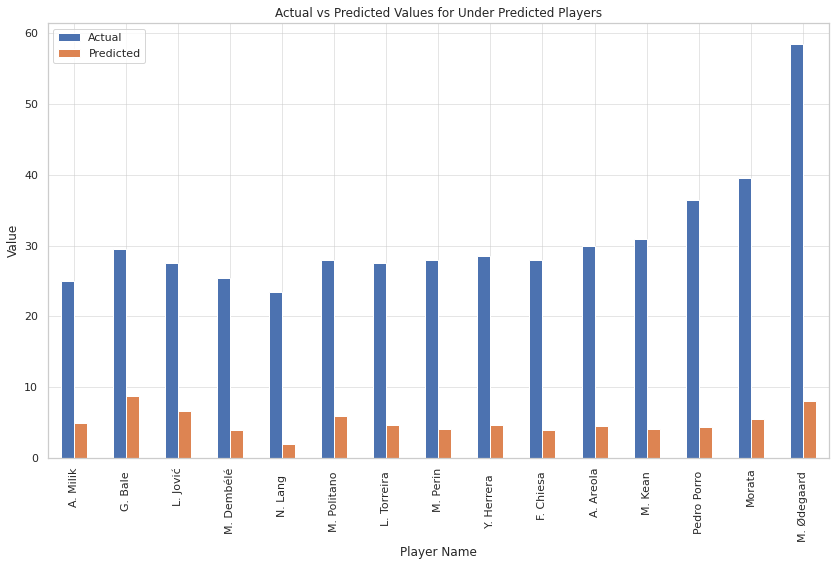

In [96]:
#Graphical comparision between the Actual and Predicted Values(Under Predicted Players) 
df_over[["Actual","Predicted"]].plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.title("Actual vs Predicted Values for Under Predicted Players")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

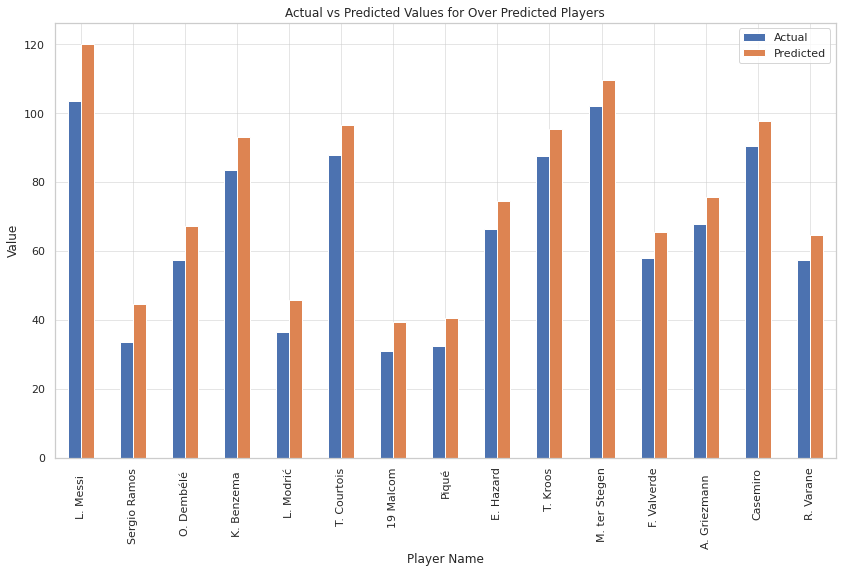

In [99]:
#Graphical comparision between the Actual and Predicted Values(Over Predicted Players)

df_under[["Actual","Predicted"]].plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.title("Actual vs Predicted Values for Over Predicted Players")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

In [103]:
#Calculating MAE, MSE, RMSE and R^2 values for the model
print('Mean Absolute Error:', metrics.mean_absolute_error(yb, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yb, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yb, y_pred)))
print('Linear Regression R^2:',regressor.score(Xb,yb))

Mean Absolute Error: 0.6763129230036424
Mean Squared Error: 2.4948854746163027
Root Mean Squared Error: 1.5795206471003482
Linear Regression R^2: 0.9614187695862774


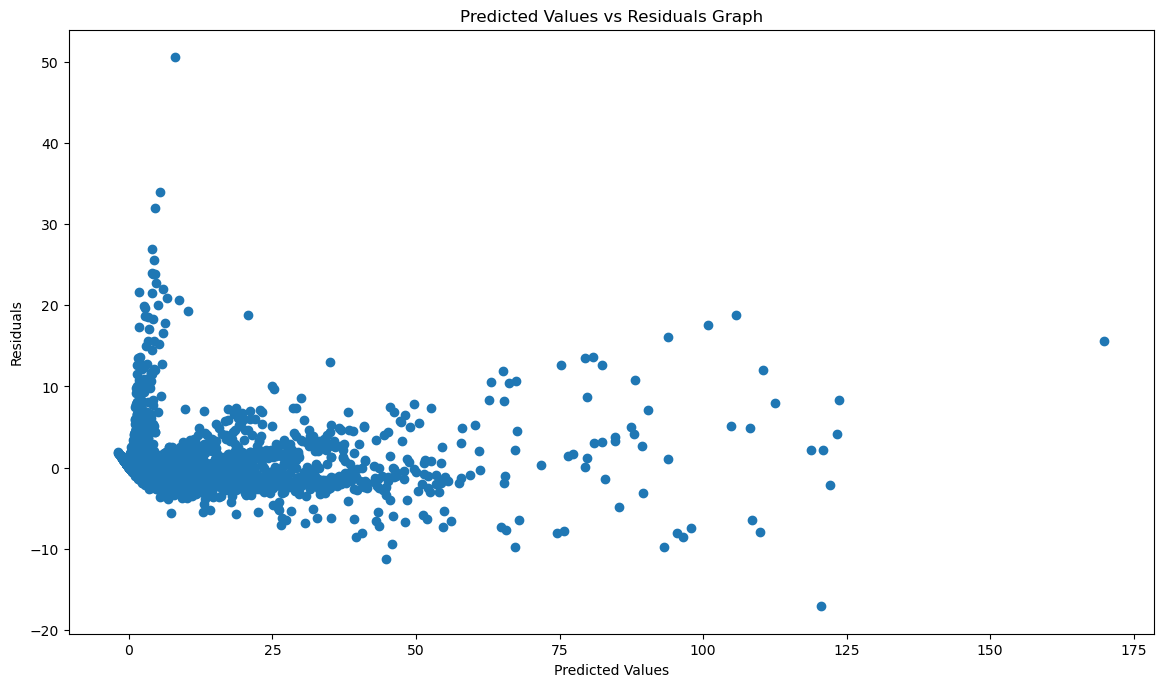

In [104]:
#Plotting Residuals
plt.figure(figsize=(14,8),dpi=100),
plt.style.use('default')
plt.scatter(resultsb.predict(), resultsb.resid);
plt.title("Predicted Values vs Residuals Graph")
plt.ylabel("Residuals")
plt.xlabel("Predicted Values")
plt.show()

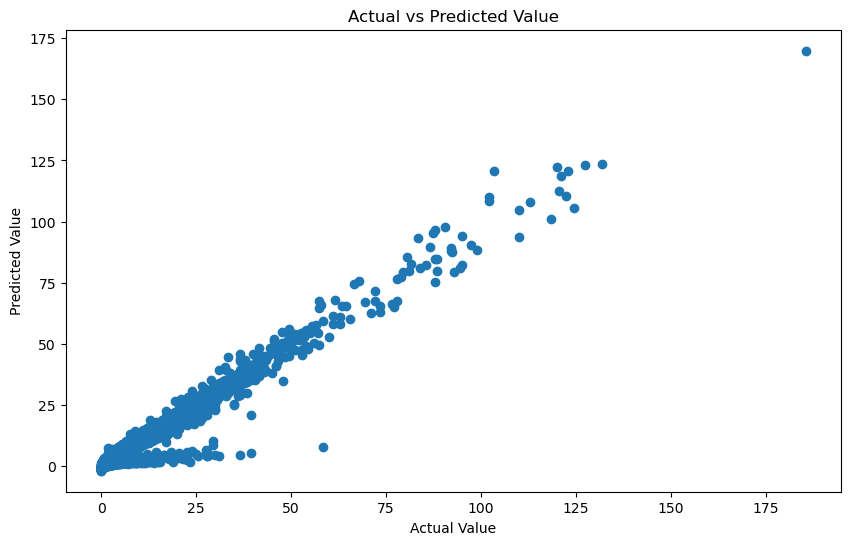

In [107]:
# Plotting graph for Actual Values vs Predicted Values
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(yb, resultsb.predict(Xb))
plt.title ("Actual vs Predicted Value")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [108]:
#Model based on Most Visited Columns

X1= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause']]
y1= player_list.loc[:,"Value"]

player_model1 = sm.OLS(y1, X1, data=player_list)

results1 = player_model1.fit()

print(results1.summary());

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          8.845e+04
Date:                Thu, 01 Jul 2021   Prob (F-statistic):                        0.00
Time:                        15:11:46   Log-Likelihood:                         -32337.
No. Observations:               16780   AIC:                                  6.468e+04
Df Residuals:                   16775   BIC:                                  6.472e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [109]:
#Correlation matrics for the most visited columns
player_list_selected_features= player_list[['Value','Overall','Age','Int_Reputation','Growth','Release_Clause']]

player_list_selected_features.corr()

,Value,Overall,Age,Int_Reputation,Growth,Release_Clause
Value,1.000000,0.571885,0.023305,0.447917,-0.106440,0.975876
Overall,0.571885,1.000000,0.451698,0.455124,-0.552280,0.536660
Age,0.023305,0.451698,1.000000,0.362182,-0.850603,0.017259
Int_Reputation,0.447917,0.455124,0.362182,1.000000,-0.257276,0.418029
Growth,-0.106440,-0.552280,-0.850603,-0.257276,1.000000,-0.091205
Release_Clause,0.975876,0.536660,0.017259,0.418029,-0.091205,1.000000


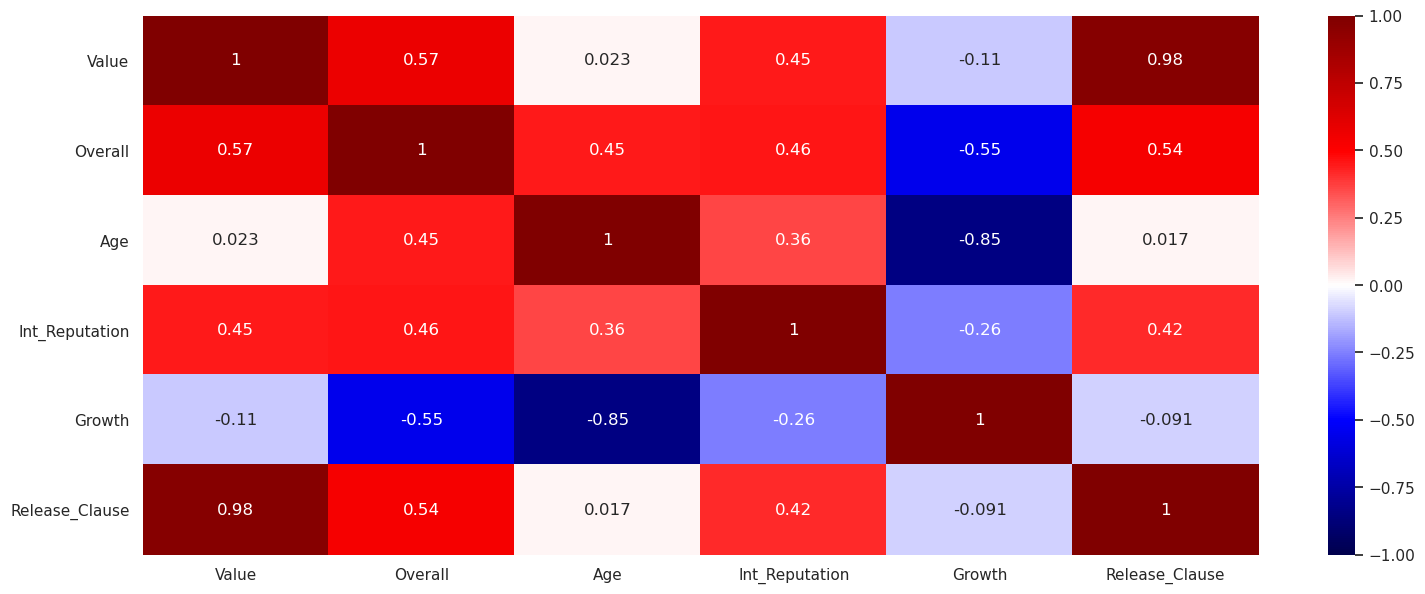

In [111]:
#Heatmap for the correlated values
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
sns.heatmap(player_list_selected_features.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0); 
plt.show()

<Figure size 2000x1000 with 0 Axes>

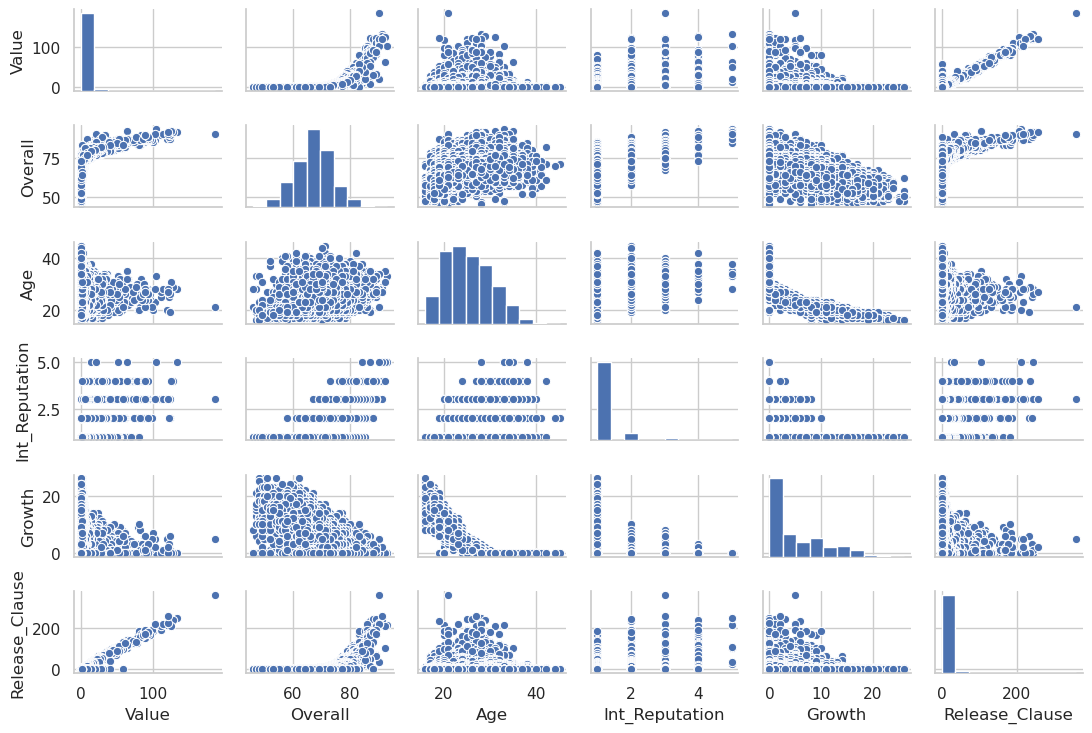

In [113]:
#Pairplot

plt.figure(1, figsize=(20, 10))
sns.set(style="whitegrid")
g=sns.pairplot(player_list_selected_features, height=1.2, aspect=1.5)
plt.yticks(rotation=90); 
plt.show()

In [114]:
#Splitting data into train, test and validation(%60 - %20)

X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X1,y1, test_size=.25, random_state=10)

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_val)
mse = np.mean((pred-y_val)**2)

print(lr.score(X_test,y_test))
print(mse)
print(lr.coef_)

0.9666848421631435
3.0711577689647807
[ 0.09225459 -0.1000133   0.95254665 -0.03138608  0.4735501 ]


In [115]:
coeff = pd.DataFrame(X_train.columns)

coeff['CoefficientEstimate'] = lr.coef_

coeff.sort_values("CoefficientEstimate")

,0,CoefficientEstimate
1,Age,-0.100013
3,Growth,-0.031386
0,Overall,0.092255
4,Release_Clause,0.473550
2,Int_Reputation,0.952547


In [119]:
#Setting up the models o choose from

lm = LinearRegression()

#Feature scaling for train, val and test in order to run the ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test to run the poly model on each
poly = PolynomialFeatures(degree=2) 

X1_poly = poly.fit_transform(Xb.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(X1, y1):.3f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.3f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.3f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
print(f'Degree 2 polynomial regression for validayion data R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression for all data R^2: 0.958
Linear Regression for test data R^2: 0.967
Linear Regression for validation data R^2: 0.965

Ridge Regression for test data R^2: 0.962
Ridge Regression for validation data R^2: 0.961

Lasso Regression for test data R^2: 0.395518
Lasso Regression for validation data R^2: 0.394543

Degree 2 polynomial regression for test data R^2: 0.982
Degree 2 polynomial regression for validayion data R^2: 0.981


In [120]:
model= sm.OLS(y1, X1, data=player_list_selected_features)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          8.845e+04
Date:                Thu, 01 Jul 2021   Prob (F-statistic):                        0.00
Time:                        15:18:53   Log-Likelihood:                         -32337.
No. Observations:               16780   AIC:                                  6.468e+04
Df Residuals:                   16775   BIC:                                  6.472e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [121]:
#Using dummy Variables for Player Position
X2 = pd.concat([player_list.drop('Position', axis=1), pd.get_dummies(player_list['Position'])],axis=1)

X2 = X2.drop(columns=["Value","Name","Team","Foot"])

y2 = yb= player_list.loc[:,"Value"]

In [122]:
#Fit model wuth the Player Market Value as Target
player_model2 = sm.OLS(y2, X2, data=player_list)

results2 = player_model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     6626.
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:20:06   Log-Likelihood:                -31463.
No. Observations:               16780   AIC:                         6.305e+04
Df Residuals:                   16716   BIC:                         6.355e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.0894      0.006  

In [123]:
#Using Dummy Variables for Team

X3 = pd.concat([player_list.drop('Team', axis=1), pd.get_dummies(player_list['Team'])],axis=1)

X3 = X3.drop(columns=["Value","Name","Position","Foot"])

y3 = yb= player_list.loc[:,"Value"]

In [124]:
#Fit model wuth the Player Market Value as Target
player_model3 = sm.OLS(y3, X3, data=player_list)

results3 = player_model3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     521.0
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:20:54   Log-Likelihood:                -29871.
No. Observations:               16780   AIC:                         6.159e+04
Df Residuals:                   15854   BIC:                         6.875e+04
Df Model:                         925                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [126]:
#Run Cross Validation

lm = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state = 100)
cross_val_score(lm, X1, y1, cv=kf, scoring='r2')

print(round(np.mean(cross_val_score(lm, Xb, yb, cv=kf, scoring='r2')),3))

0.96


# Assumptions of Linear Regression

### Assumption 1: The regression is linear in parameters and specified correctly 

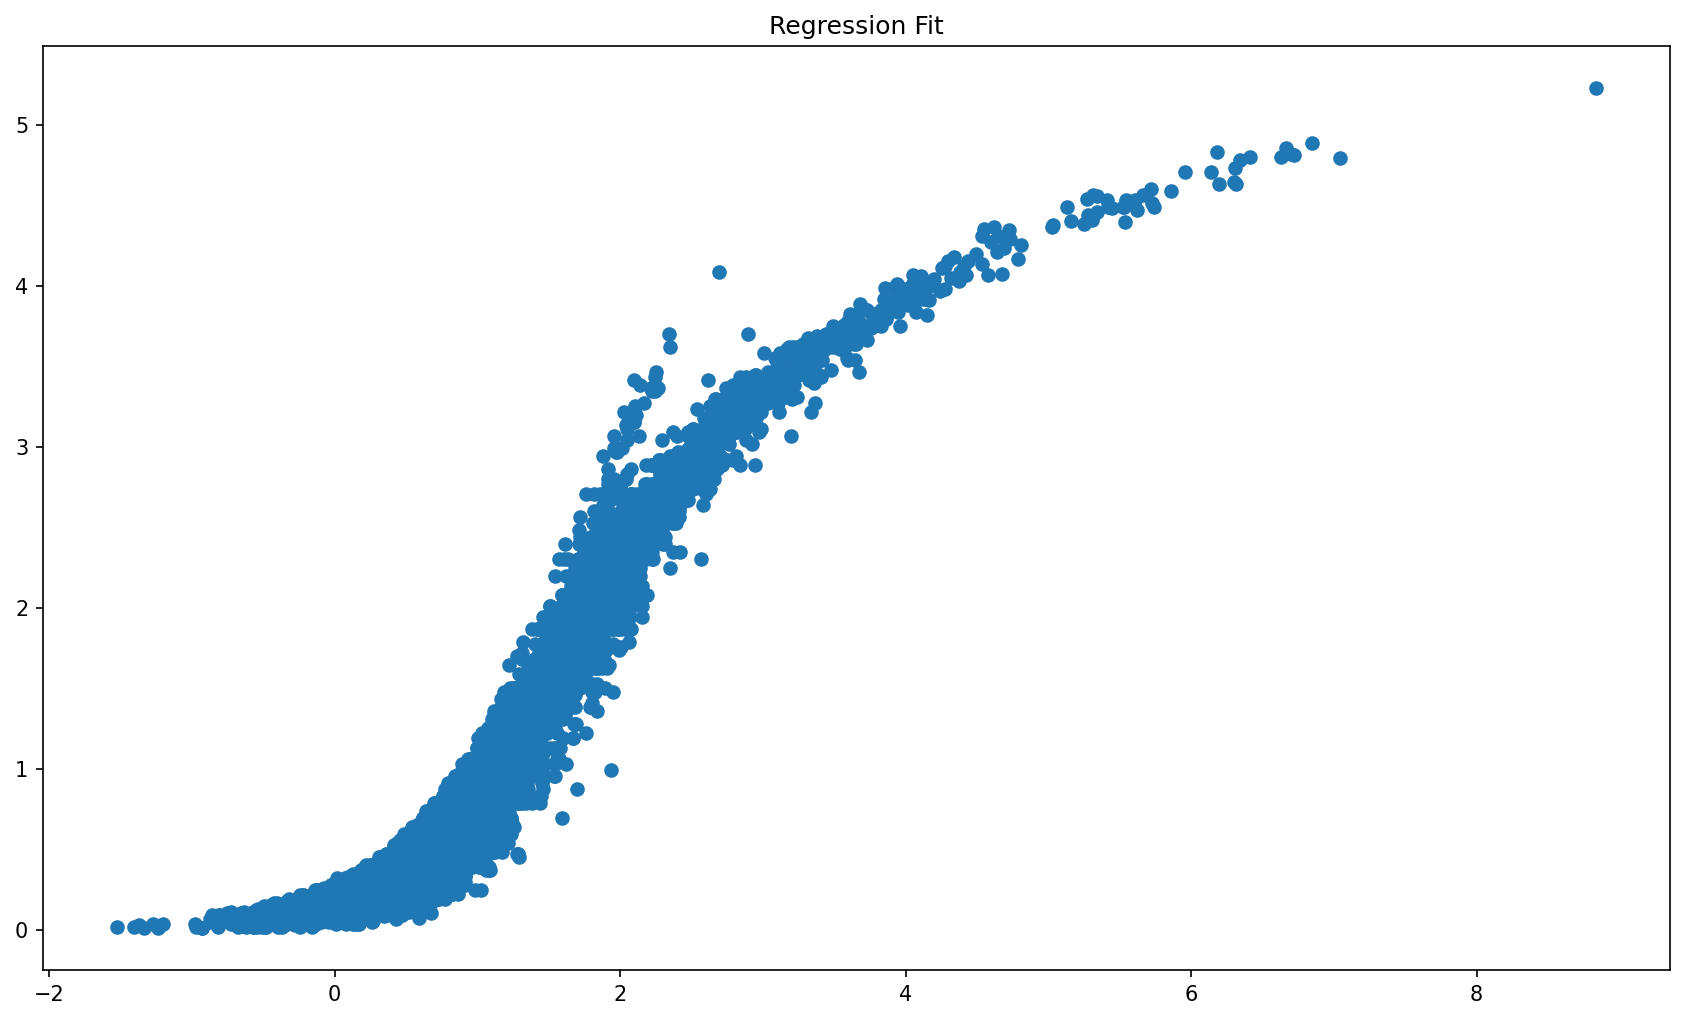

In [179]:
#Regression Fit
plt.figure(figsize=(14,8),dpi=150),
lr = LinearRegression()
fit = lr.fit(X1,y1);
pred = lr.predict(X1)
plt.scatter(pred,y1)
plt.title("Regression Fit")
plt.show()

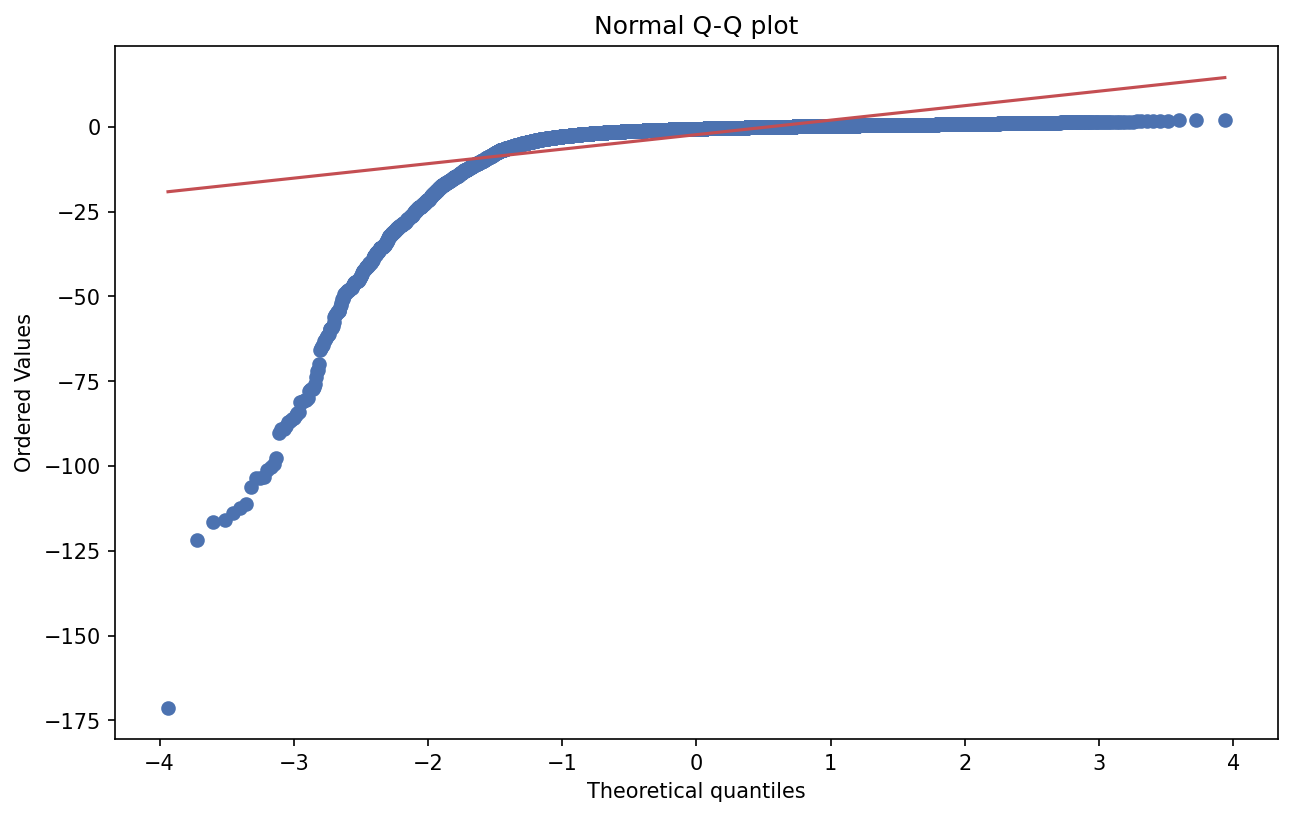

In [180]:
#Normal Q-Q Plot
plt.figure(figsize=(10,6),dpi=150),
stats.probplot(df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### Assumption 2: The residuals should be normally distributed with a zero mean.

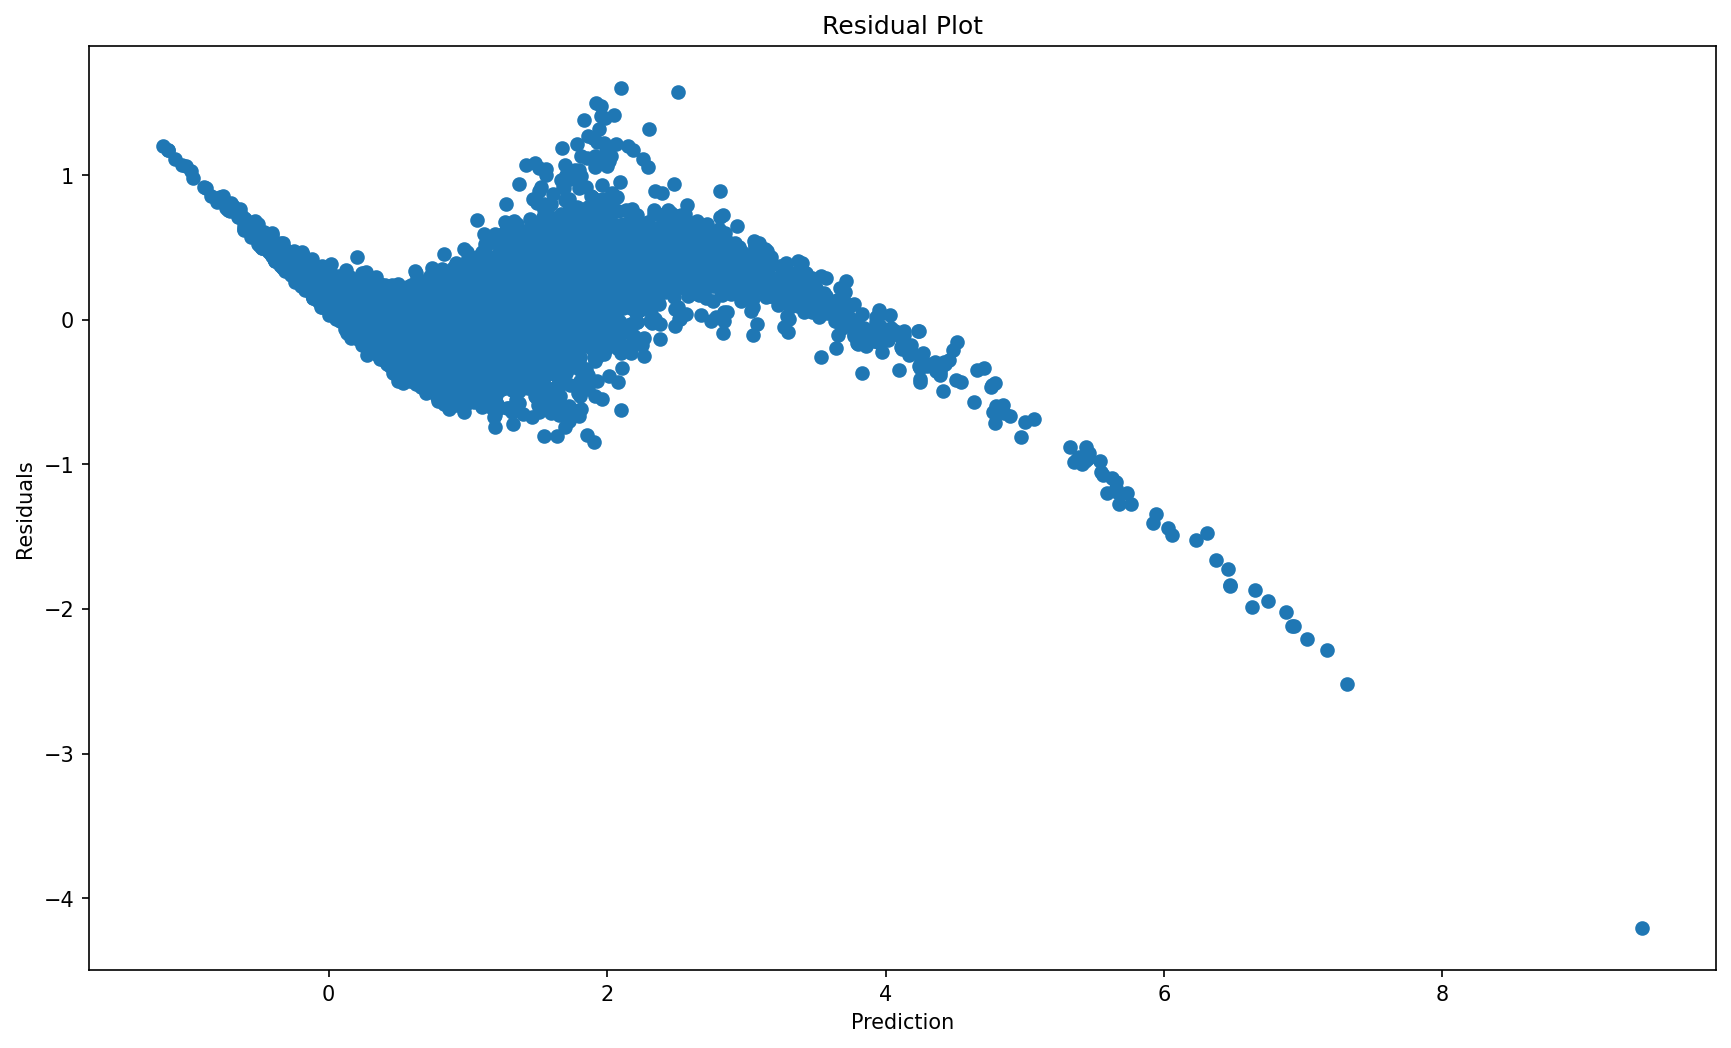

In [181]:
# Plot your predicted values on the x-axis, and your residuals on the y-axis

player_model = sm.OLS(y1, X1, data=player_list)

resultsl = player_model.fit()

plt.figure(figsize=(14,8),dpi=150),
plt.style.use('default')
plt.scatter(resultsl.predict(), resultsl.resid);
plt.title("Residual Plot")
plt.ylabel("Residuals")
plt.xlabel("Prediction")
plt.show()

### Assumption 3: Homoscedasticity test for residuals.

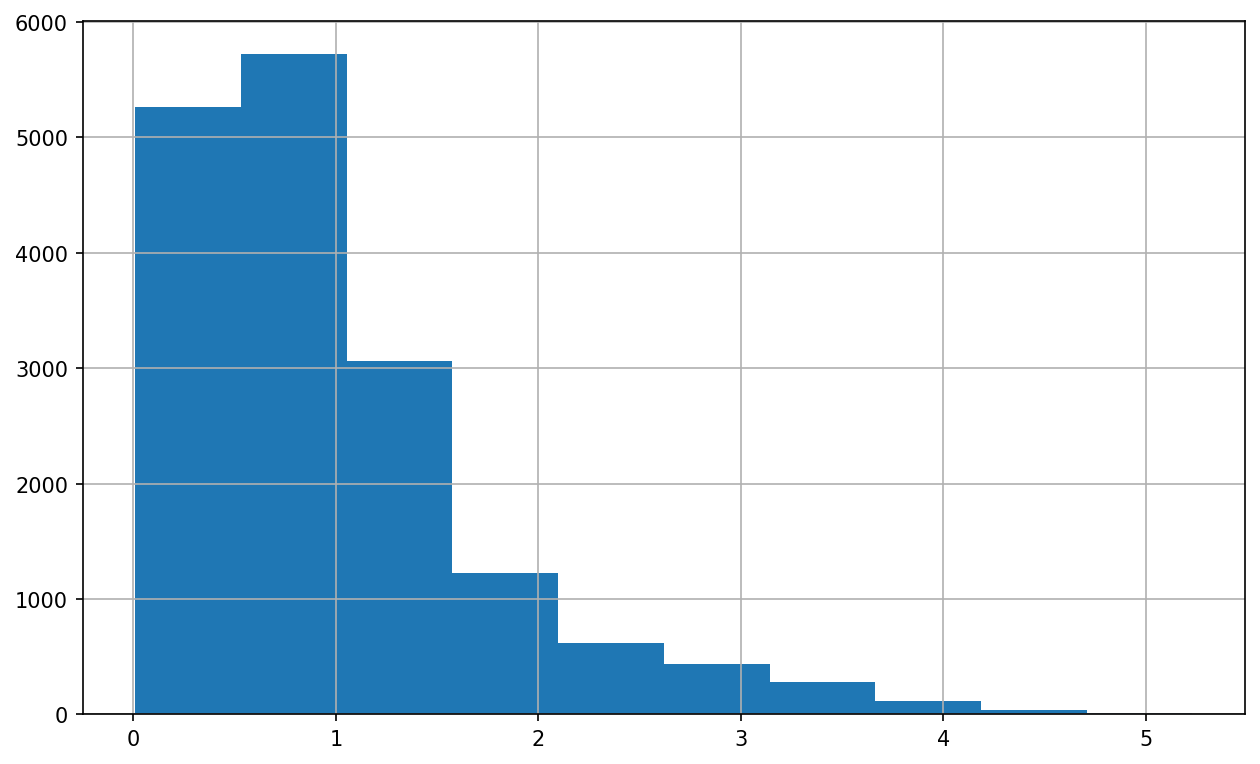

In [183]:
# create histogram
plt.figure(figsize=(10,6),dpi=150),

y1.hist();

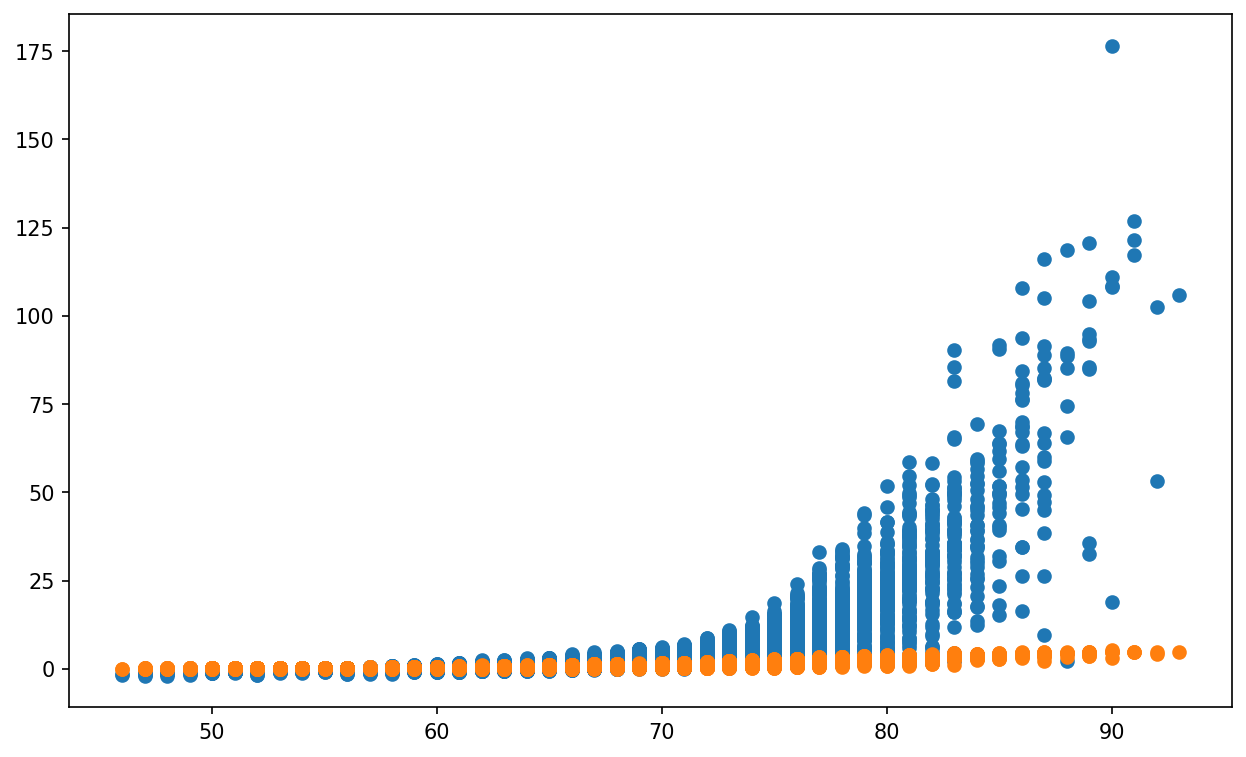

In [184]:
# quick reg plot
plt.figure(figsize=(10,6),dpi=150),


plt.scatter(X1.Overall,df.predict)
plt.scatter(X1.Overall,y1);

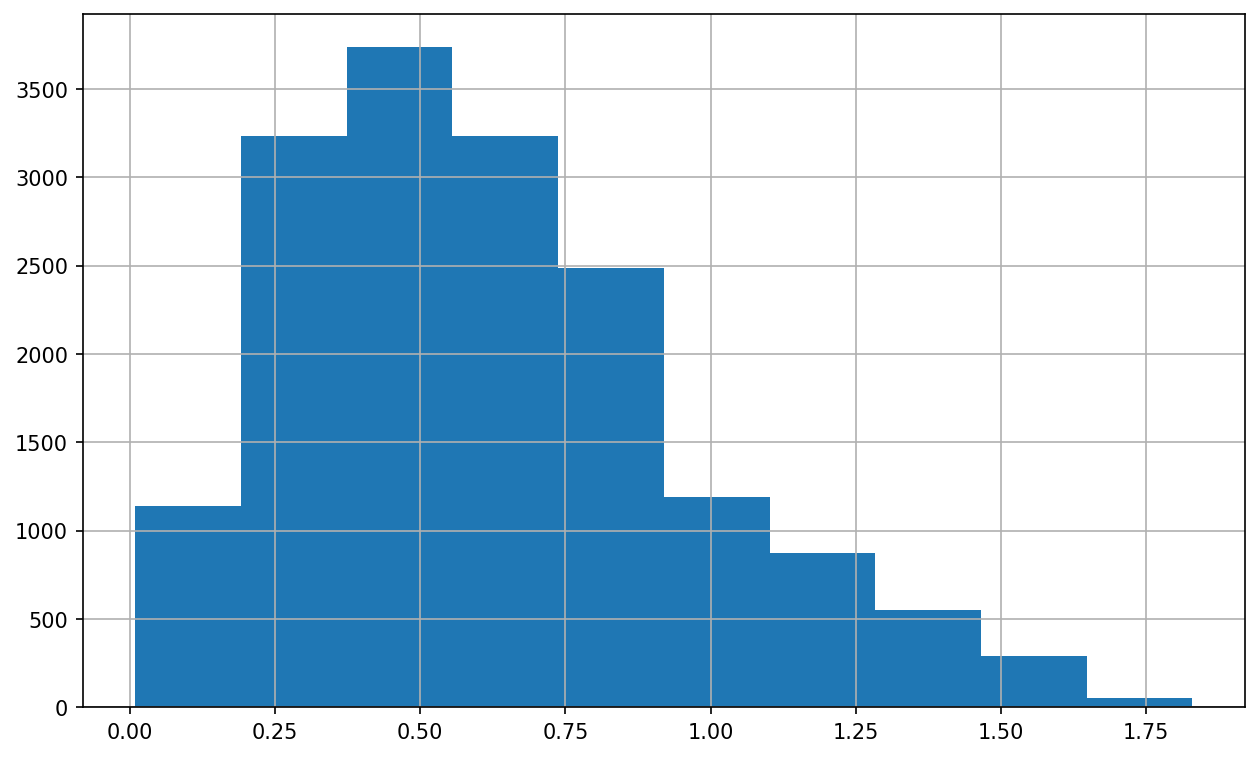

In [186]:
plt.figure(figsize=(10,6),dpi=150),


np.log1p(y1).hist();

In [187]:
#set up the model with log value

X1= player_list.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause',]]
y1= player_list.loc[:,"Value"]

yl = np.log1p(y1)

player_model1 = sm.OLS(y1, X1, data=player_list)

results1 = player_model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                          7.155e+04
Date:                Thu, 01 Jul 2021   Prob (F-statistic):                        0.00
Time:                        15:55:03   Log-Likelihood:                         -32577.
No. Observations:               16780   AIC:                                  6.517e+04
Df Residuals:                   16774   BIC:                                  6.521e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Overall            0.0917      0.003     34.888      0.000       0.087       0.097
Age               -0.0727      0.005    -15.093      0.000      -0.082      -0.063
Weight             0.0190      0.003      7.234      0.000       0.014       0.024
Height            -0.0283      0.002    -16.185      0.000      -0.032      -0.025
Growth            -0.0238      0.004     -5.338      0.000      -0.033      -0.015
Release_Clause     0.4879      0.001    474.460      0.000       0.486       0.490
==============================================================================
Omnibus:                    25747.607   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20869018.039
Skew:                           9.490   Prob(JB):                         0.00
Kurtosis:                     174.721   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
#Coefficients chosen by the regression model
regressor = LinearRegression()
regressor.fit(X1,y1)
coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False)

,Coefficient
Release_Clause,0.485275
Overall,0.106598
Weight,0.004020
Height,-0.000990
Growth,-0.004390
Age,-0.056789


In [189]:
#Prediction on all data and calculate difference between tha actual value and predicted value
#ye=np.exp(yl)
y_pred = regressor.predict(X1)
df = pd.DataFrame({'Name':player_list.Name,'Actual': y1, 'Predicted': (y_pred)})
df['Actual_n'] = np.expm1(df['Actual'])
df['Predicted_n'] = np.expm1(df['Predicted'])

#df_under = round(df.sort_values('Difference_n').set_index('Name').head(10),2)
#df_over = round(df.sort_values('Difference_n').set_index('Name').tail(10),2)
df

,Name,Actual,Predicted,Actual_n,Predicted_n
0,M. Locatelli,31.0,30.641180,2.904885e+13,2.029062e+13
1,J. Sancho,118.5,104.984996,2.910021e+51,3.930109e+45
2,J. Mascherano,3.4,3.659914,2.896410e+01,3.785802e+01
4,Nuno Tavares,4.9,6.540264,1.332898e+02,6.914694e+02
5,L. Messi,103.5,105.824113,8.901821e+44,9.095535e+45
...,...,...,...,...,...
18473,P. Steinwender,0.8,0.306188,1.225541e+00,3.582374e-01
18474,J. Zeballos,1.2,0.298650,2.320117e+00,3.480383e-01
18475,J. Arweiler,0.8,0.091634,1.225541e+00,9.596331e-02
18476,J. Sekidika,1.4,0.491065,3.055200e+00,6.340548e-01


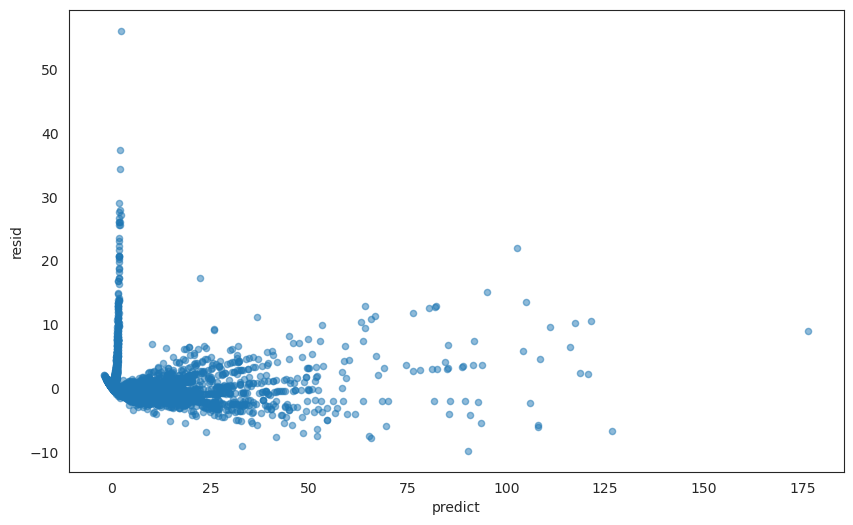

In [190]:
df['predict']=(regressor.predict(X1))
df['resid']= (y1-df.predict)
with sns.axes_style('white'):
    plot = df.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(10,6))

### Assumption 4: Detecting correlation between residuals and observations 

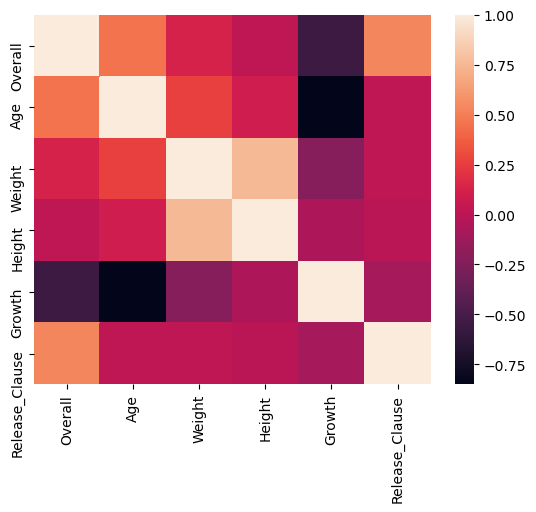

In [191]:
sns.heatmap(X1.corr())

### Assumption 5: Multicollinearity test according to Condition Number 

In [168]:
#set up the model with log value

X1= player_list.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause',]]
y1= player_list.loc[:,"Value"]

yl = np.log1p(y1)

player_model1 = sm.OLS(yl, X1, data=player_list)

results1 = player_model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          6.671e+04
Date:                Thu, 01 Jul 2021   Prob (F-statistic):                        0.00
Time:                        15:48:32   Log-Likelihood:                         -679.01
No. Observations:               16780   AIC:                                      1370.
Df Residuals:                   16774   BIC:                                      1416.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Overall            0.0867      0.000    220.852      0.000       0.086       0.087
Age               -0.0625      0.001    -86.812      0.000      -0.064      -0.061
Weight             0.0110      0.000     27.950      0.000       0.010       0.012
Height            -0.0228      0.000    -87.296      0.000      -0.023      -0.022
Growth            -0.0105      0.001    -15.757      0.000      -0.012      -0.009
Release_Clause     0.0175      0.000    113.973      0.000       0.017       0.018
==============================================================================
Omnibus:                     2935.870   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71048.316
Skew:                          -0.001   Prob(JB):                         0.00
Kurtosis:                      13.081   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Final Model

In [170]:
#set up the 4 models we're choosing from:

X1= player_list.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause',]]
y1= player_list.loc[:,"Value"]

y1 = np.log1p(y1)

X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X1,y1, test_size=.25, random_state=10)


lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X1_poly = poly.fit_transform(Xb.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(X1, yl):.6f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.6f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.6f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.6f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.6f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.6f}')
print(f'Degree 2 polynomial regression for validation data R^2: {lm_poly.score(X_val_poly, y_val):.6f}')

Linear Regression for all data R^2: 0.918909
Linear Regression for test data R^2: 0.907399
Linear Regression for validation data R^2: 0.913703

Ridge Regression for test data R^2: 0.904140
Ridge Regression for validation data R^2: 0.910047

Lasso Regression for test data R^2: -0.000011
Lasso Regression for validation data R^2: -0.000213

Degree 2 polynomial regression for test data R^2: 0.980326
Degree 2 polynomial regression for validation data R^2: 0.980921


In [171]:
#Cross Validation

lm = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state = 10)
cross_val_score(lm, X1, yl, cv=kf, scoring='r2')

print(round(np.mean(cross_val_score(lm, X1, yl, cv=kf, scoring='r2')),5))

0.91858
